# GOES X-ray Flux

- https://services.swpc.noaa.gov/json/goes/primary/
- https://www.swpc.noaa.gov/products/goes-x-ray-flux
- https://docs.sunpy.org/en/stable/generated/gallery/time_series/index.html
- https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/docs/GOES-R_XRS_L2_Data_Users_Guide.pdf

The X-ray Sensor (XRS) on board the GOES series of satellites have provided soft X-ray measurements in two broadband energy ranges 0.5-4 (XRS-A) and 1-8 angstrom (XRS-B) since 1975. The flux levels in the GOES 1-8 angstrom (XRS-B) channel are used to report flares and determine their size (i.e. their GOES class).

In [ ]:
import pandas as pd

In [ ]:
goes_json_data = pd.read_json("https://services.swpc.noaa.gov/json/goes/primary/xrays-7-day.json")
# goes_json_data = pd.read_json("https://services.swpc.noaa.gov/json/goes/secondary/xrays-7-day.json")

In [ ]:
goes_json_data

,time_tag,satellite,flux,observed_flux,electron_correction,electron_contaminaton,energy
0,2025-02-07T20:37:00Z,16,2.656875e-08,3.637916e-08,9.810411e-09,False,0.05-0.4nm
1,2025-02-07T20:37:00Z,16,1.530145e-06,1.552927e-06,2.278216e-08,False,0.1-0.8nm
2,2025-02-07T20:38:00Z,16,2.919219e-08,3.846823e-08,9.276042e-09,False,0.05-0.4nm
3,2025-02-07T20:38:00Z,16,1.532978e-06,1.555266e-06,2.228875e-08,False,0.1-0.8nm
4,2025-02-07T20:39:00Z,16,2.780771e-08,3.717500e-08,9.367291e-09,False,0.05-0.4nm
...,...,...,...,...,...,...,...
20151,2025-02-14T20:32:00Z,16,1.176046e-06,1.195486e-06,1.943998e-08,False,0.1-0.8nm
20152,2025-02-14T20:33:00Z,16,2.334477e-08,3.218842e-08,8.843656e-09,False,0.05-0.4nm
20153,2025-02-14T20:33:00Z,16,1.184445e-06,1.203602e-06,1.915642e-08,False,0.1-0.8nm
20154,2025-02-14T20:34:00Z,16,2.578492e-08,3.441889e-08,8.633966e-09,False,0.05-0.4nm


In [ ]:
goes_xrsa = goes_json_data[goes_json_data['energy'] == '0.05-0.4nm']
goes_xrsb = goes_json_data[goes_json_data['energy'] == '0.1-0.8nm']

In [ ]:
from sunpy.time import parse_time

In [ ]:
time_array = parse_time(goes_xrsa['time_tag'])

In [ ]:
import astropy.units as u

In [ ]:
units = dict([("xrsa", u.W/u.m**2), ("xrsb", u.W/u.m**2)])

In [ ]:
meta = dict({"instrument": "GOES X-ray sensor", "measurements": "primary", "type": "quicklook"})

In [ ]:
goes_data = pd.DataFrame({"xrsa": goes_xrsa["flux"].values, "xrsb": goes_xrsb["flux"].values}, index=time_array.datetime)
goes_data

,xrsa,xrsb
2025-02-07 20:37:00,2.656875e-08,0.000002
2025-02-07 20:38:00,2.919219e-08,0.000002
2025-02-07 20:39:00,2.780771e-08,0.000002
2025-02-07 20:40:00,2.525092e-08,0.000002
2025-02-07 20:41:00,2.262924e-08,0.000001
...,...,...
2025-02-14 20:30:00,2.005089e-08,0.000001
2025-02-14 20:31:00,2.175538e-08,0.000001
2025-02-14 20:32:00,2.347926e-08,0.000001
2025-02-14 20:33:00,2.334477e-08,0.000001


In [ ]:
from sunpy import timeseries as ts

In [ ]:
goes_ts = ts.TimeSeries(goes_data, meta, units, source="xrs")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
type(goes_ts)

sunpy.timeseries.sources.goes.XRSTimeSeries

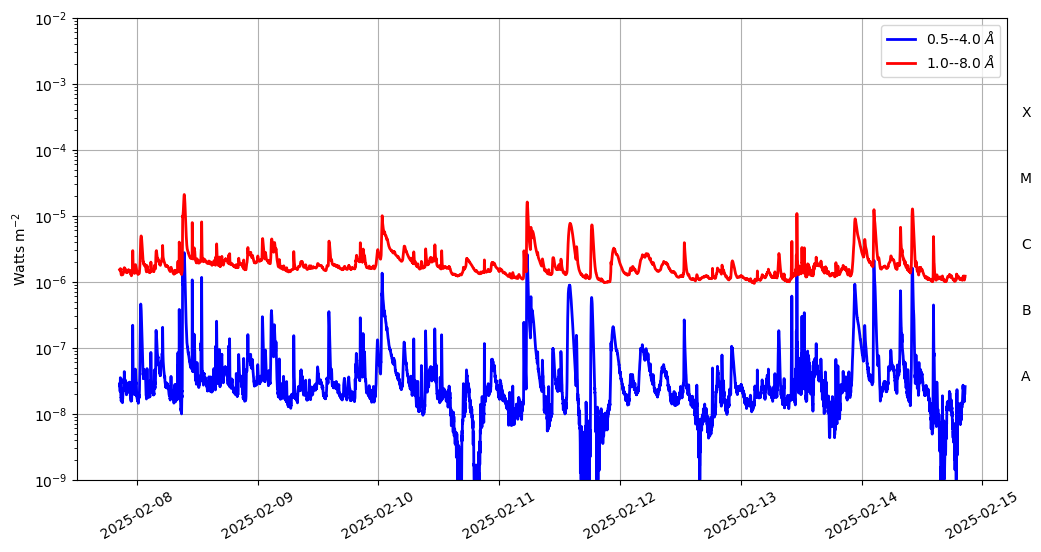

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
goes_ts.plot(axes=ax)
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=30)
plt.show()

In [ ]:
from datetime import datetime, timezone, timedelta

In [ ]:
now = datetime.now(timezone.utc)
now.strftime("%Y-%m-%d %H:%M:%S")

'2025-02-14 20:46:43'

In [ ]:
kst = now + timedelta(hours=9)
kst.strftime("%Y-%m-%d %H:%M:%S")

'2025-02-15 05:46:43'

datetime.datetime(2025, 2, 7, 20, 37)

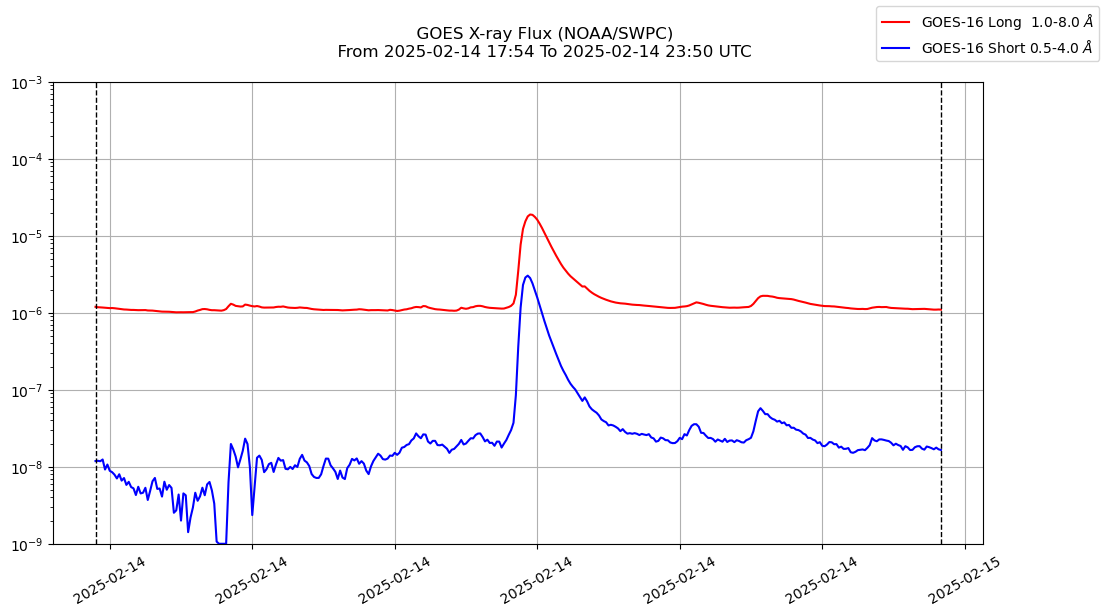

In [ ]:
sat = str(goes_json_data['satellite'].unique()[0])

time_tag = parse_time(goes_xrsb['time_tag']).datetime

first_time = time_tag[0]
last_time = time_tag[-1]

now = datetime.now(timezone.utc)
kst = now + timedelta(hours=9)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(parse_time(goes_xrsb['time_tag']).datetime, goes_xrsb['flux'].values,
        label=f'GOES-{sat} Long  1.0-8.0 $\AA$', color='red')
ax.plot(parse_time(goes_xrsa['time_tag']).datetime, goes_xrsa['flux'].values, 
        label=f'GOES-{sat} Short 0.5-4.0 $\AA$', color='blue')
ax.set_yscale('log')
ax.set_ylim(1e-9, 1e-3)
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax.axvline(now, color='black', linestyle='--', linewidth=1)
ax.axvline(first_time, color='black', linestyle='--', linewidth=1)
ax.axvline(last_time, color='black', linestyle='--', linewidth=1)
fig.legend()
plt.xticks(rotation=30)
plt.title(f"""
          GOES X-ray Flux (NOAA/SWPC)
          From {first_time.strftime("%Y-%m-%d %H:%M")} To {last_time.strftime("%Y-%m-%d %H:%M")} UTC
          """)
plt.show()

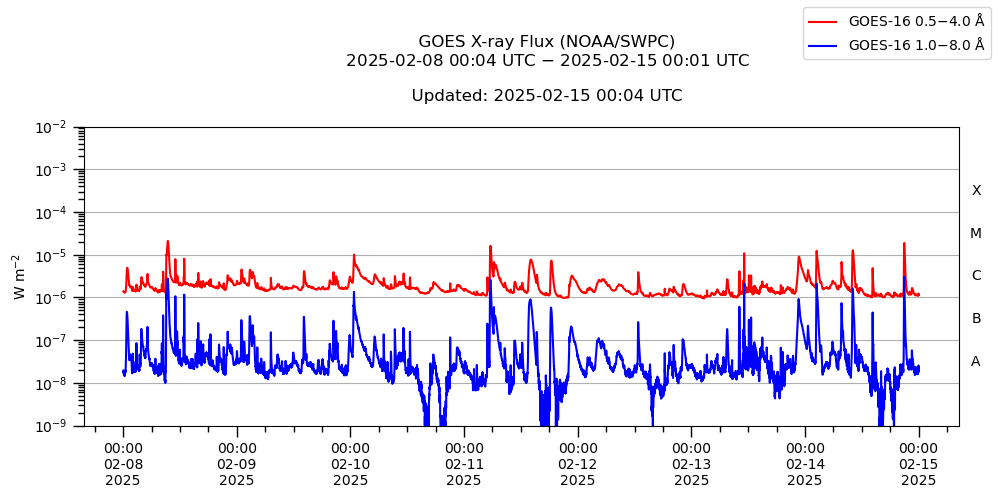

In [ ]:
import pandas as pd
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta, datetime, timezone
import numpy as np

# data_type = 'xrays-6-hour'
# data_type = 'xrays-1-day'
# data_type = 'xrays-3-day'
data_type = 'xrays-7-day'
now = datetime.now(timezone.utc)

goes_json_data = pd.read_json(f"https://services.swpc.noaa.gov/json/goes/primary/{data_type}.json")
goes_xrsa = goes_json_data[goes_json_data['energy'] == '0.05-0.4nm']
goes_xrsb = goes_json_data[goes_json_data['energy'] == '0.1-0.8nm']

satellite = str(goes_json_data['satellite'].unique()[0])
time_array = parse_time(goes_xrsa['time_tag']).datetime
first_time = time_array[0]
last_time = time_array[-1]
# first_time_kst = first_time + timedelta(hours=9)
# last_time_kst = last_time + timedelta(hours=9)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(parse_time(goes_xrsb['time_tag']).datetime, goes_xrsb['flux'].values,
        label=f"GOES-{satellite} " +  r"0.5$-$4.0 $\mathrm{\AA}$", color='red')
ax.plot(parse_time(goes_xrsa['time_tag']).datetime, goes_xrsa['flux'].values, 
        label=f"GOES-{satellite} " +  r"1.0$-$8.0 $\mathrm{\AA}$", color='blue')
ax.set_yscale('log')
ax.set_ylim(1e-9, 1e-2)
ax.set_ylabel("W m$^{-2}$")
labels = ['A', 'B', 'C', 'M', 'X']
centers = np.logspace(-7.6, -3.6, len(labels))
for value, label in zip(centers, labels):
    ax.text(1.02, value, label, transform=ax.get_yaxis_transform(), horizontalalignment='center')
ax.yaxis.grid(True, "major")
ax.xaxis.grid(False, "major")
ax.tick_params(axis='x', which='minor', length=4, width=1, color='black')
ax.tick_params(axis='x', which='major', length=8, width=1, color='black')
ax.tick_params(axis='y', which='minor', length=4, width=1, color='black')
ax.tick_params(axis='y', which='major', length=8, width=1, color='black')
if data_type == 'xrays-6-hour':
    plt.xticks(rotation=0)
    # ft = datetime(first_time.year, first_time.month, first_time.day, first_time.hour, 0, 0, 0, tzinfo=timezone.utc)
    # lt = datetime(last_time.year, last_time.month, last_time.day, last_time.hour, 0, 0, 0, tzinfo=timezone.utc) + timedelta(hours=1)
    # date_list = pd.date_range(start=ft, end=lt, freq='h').to_pydatetime().tolist()
    # ax.set_xticks(date_list)
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[0, 30]))
if data_type == 'xrays-1-day':
    plt.xticks(rotation=0)
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
if data_type == 'xrays-3-day':
    plt.xticks(rotation=0)
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
if data_type == 'xrays-7-day':
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))

fig.legend(loc='upper right')
plt.title(f"""
          GOES X-ray Flux (NOAA/SWPC)
          {first_time.strftime("%Y-%m-%d %H:%M")} UTC $-$ {last_time.strftime("%Y-%m-%d %H:%M")} UTC
          
          Updated: {now.strftime("%Y-%m-%d %H:%M")} UTC
          """)
# ax.text(1.02, 10**-9.5, f'Updated: {last_time_kst.strftime("%Y-%m-%d %H:%M")} KST', transform=ax.get_yaxis_transform(), horizontalalignment='center')
plt.tight_layout()
plt.show()

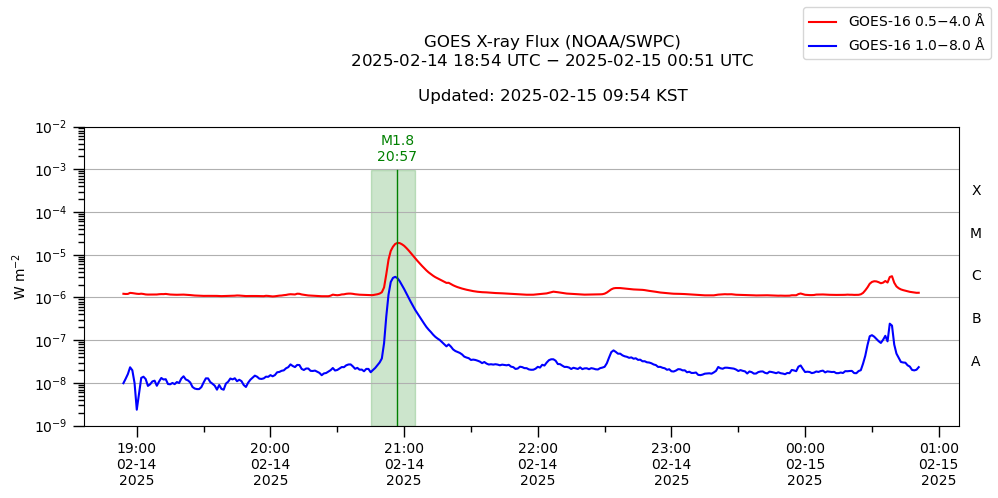

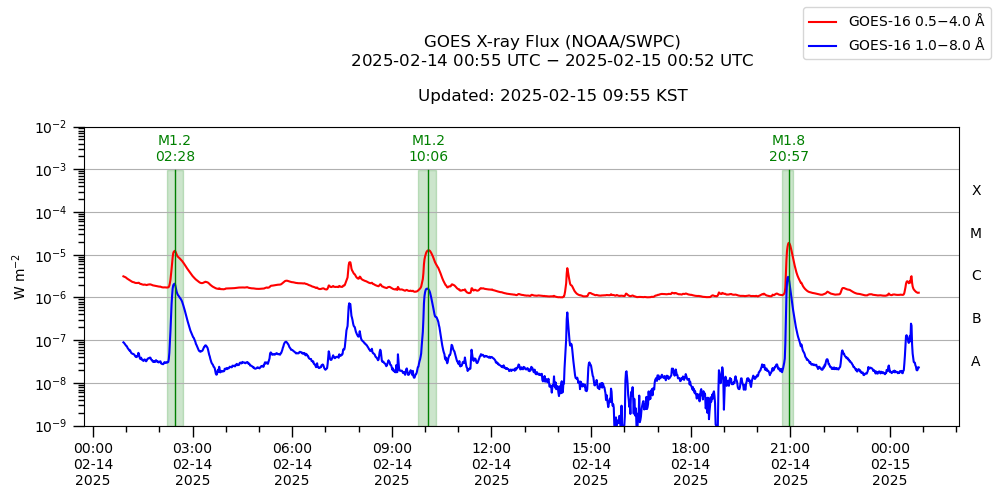

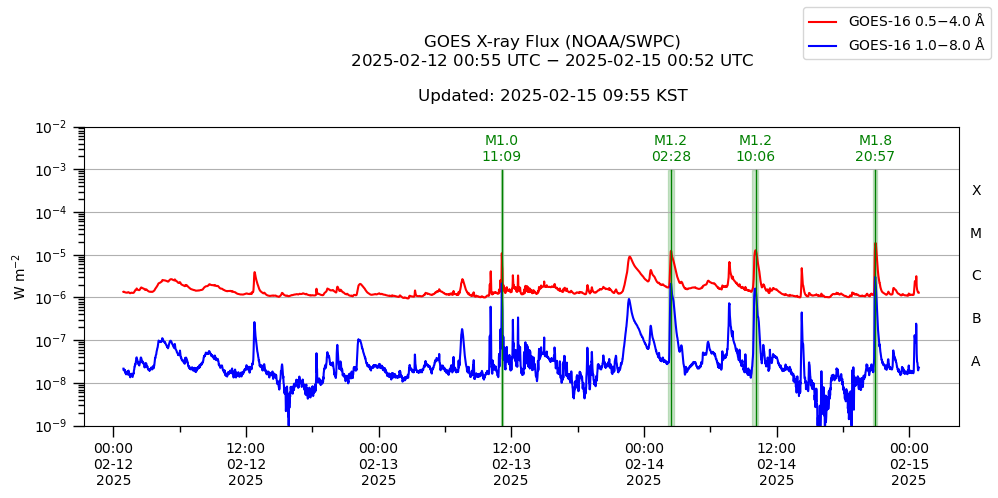

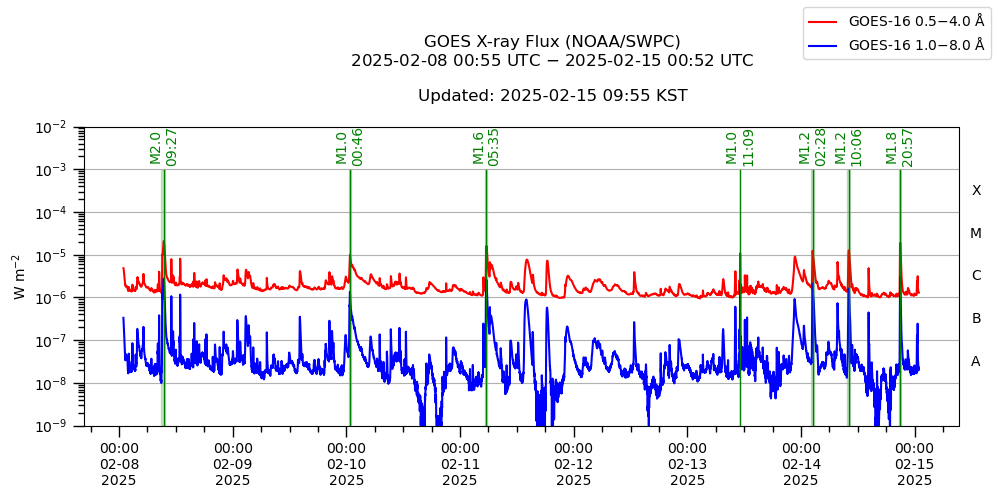

In [ ]:
import pandas as pd
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timezone
import numpy as np

# data_type
data_type_list = ['xrays-6-hour', 'xrays-1-day', 'xrays-3-day', 'xrays-7-day']

for data_type in data_type_list:
    # get current time
    now = datetime.now(timezone.utc) + timedelta(hours=9)

    # get GOES X-ray data
    goes_json_data = pd.read_json(f"https://services.swpc.noaa.gov/json/goes/primary/{data_type}.json")
    goes_xrsa = goes_json_data[goes_json_data['energy'] == '0.05-0.4nm']
    goes_xrsb = goes_json_data[goes_json_data['energy'] == '0.1-0.8nm']

    # get satellite number
    satellite = str(goes_json_data['satellite'].unique()[0])

    # get time range
    time_array = parse_time(goes_xrsa['time_tag']).datetime
    first_time = time_array[0]
    last_time = time_array[-1]

    # create figure and plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # plot GOES X-ray flux
    ax.plot(parse_time(goes_xrsb['time_tag']).datetime, goes_xrsb['flux'].values,
            label=f"GOES-{satellite} " +  r"0.5$-$4.0 $\mathrm{\AA}$", color='red')
    ax.plot(parse_time(goes_xrsa['time_tag']).datetime, goes_xrsa['flux'].values, 
            label=f"GOES-{satellite} " +  r"1.0$-$8.0 $\mathrm{\AA}$", color='blue')

    # set y-axis scale and limit
    ax.set_yscale('log')
    ax.set_ylim(1e-9, 1e-2)
    ax.set_ylabel("W m$^{-2}$")

    # set grid and ticks
    ax.yaxis.grid(True, "major")
    ax.xaxis.grid(False, "major")
    ax.tick_params(axis='x', which='minor', length=4, width=1, color='black')
    ax.tick_params(axis='x', which='major', length=8, width=1, color='black')
    ax.tick_params(axis='y', which='minor', length=4, width=1, color='black')
    ax.tick_params(axis='y', which='major', length=8, width=1, color='black')

    # set y-axis labels (flare class)
    labels = ['A', 'B', 'C', 'M', 'X']
    centers = np.logspace(-7.6, -3.6, len(labels))
    for value, label in zip(centers, labels):
        ax.text(1.02, value, label, transform=ax.get_yaxis_transform(), horizontalalignment='center')

    # x-axis tick time format
    if data_type == 'xrays-6-hour':
        plt.xticks(rotation=0)
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
        ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[0, 30]))
    if data_type == 'xrays-1-day':
        plt.xticks(rotation=0)
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
        ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
    if data_type == 'xrays-3-day':
        plt.xticks(rotation=0)
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
        ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
    if data_type == 'xrays-7-day':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
        ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))

    # plot flare events
    goes_xray_flare_week = pd.read_json("https://services.swpc.noaa.gov/json/goes/primary/xray-flares-7-day.json")
    goes_xray_flare_week = goes_xray_flare_week[goes_xray_flare_week['max_class'].str.startswith('M')]
    goes_xray_flare_week['max_time_datetime'] = parse_time(goes_xray_flare_week['max_time']).datetime
    goes_xray_flare_week = goes_xray_flare_week[goes_xray_flare_week['max_time_datetime'] >= first_time]
    for i, s in goes_xray_flare_week.iterrows():
        ax.axvline(s['max_time'], color='green', linestyle='-', linewidth=1, ymax=0.855)
        ax.axvspan(s['begin_time'], s['end_time'], color='green', alpha=0.2, ymax=0.855)
        if data_type == 'xrays-6-hour':
            class_text = f"{s['max_class']}\n{s['max_time'].strftime('%H:%M')}"
            ax.text(s['max_time'], 1.3e-3, class_text, color='green', rotation=0, verticalalignment='bottom', horizontalalignment='center')
        if data_type == 'xrays-1-day':
            class_text = f"{s['max_class']}\n{s['max_time'].strftime('%H:%M')}"
            ax.text(s['max_time'], 1.3e-3, class_text, color='green', rotation=0, verticalalignment='bottom', horizontalalignment='center')
        if data_type == 'xrays-3-day':
            class_text = f"{s['max_class']}\n{s['max_time'].strftime('%H:%M')}"
            ax.text(s['max_time'], 1.3e-3, class_text, color='green', rotation=0, verticalalignment='bottom', horizontalalignment='center')
        if data_type == 'xrays-7-day':
            class_text = f"{s['max_class']}\n{s['max_time'].strftime('%H:%M')}"
            ax.text(s['max_time'], 1.22e-3, class_text, color='green', rotation=90, verticalalignment='bottom', horizontalalignment='center')

    # set legend and title
    fig.legend(loc='upper right')
    plt.title(f"""
            GOES X-ray Flux (NOAA/SWPC)
            {first_time.strftime("%Y-%m-%d %H:%M")} UTC $-$ {last_time.strftime("%Y-%m-%d %H:%M")} UTC
            
            Updated: {now.strftime("%Y-%m-%d %H:%M")} KST
            """)
    plt.tight_layout()
    fig.savefig(f"goes_{data_type}.png", dpi=300)
    plt.show()